In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv('Loan_prediction_dataset for Numpy checkpoint.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
# checking data for missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
# Splitting data into categorical and numerical
num = data.select_dtypes(include = 'number')
cat = data.select_dtypes(exclude = 'number')

print(f'Numerical Variables')
display(num.head())
print(f'\n\nCategorical Variables')
display(cat.head())

Numerical Variables


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0




Categorical Variables


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [14]:
# data['Dependents'].sample(200).values
data['Dependents'] = data['Dependents'].str.replace('+', '')
data['Dependents'] = data['Dependents'].astype(float)
data['Dependents'].dtypes

dtype('float64')

In [15]:
# Cleaning data
for i in num.columns:
    if i in data.columns:
        data[i].fillna(data[i].median(), inplace = True)
for i in cat.columns:
    if i in data.columns:
        data[i].fillna(data[i].mode()[0], inplace = True)

data.isnull().sum().sort_values(ascending = False).head()

Loan_ID       0
Gender        0
Married       0
Dependents    0
Education     0
dtype: int64

<b><h3>Data Preprocessing And Feature Engineering

In [16]:
# Ensure Data Consistency
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [17]:
# convert all text columns to numbers
# scale the data so they have lesser range of values

from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
encoder = LabelEncoder()

In [18]:
# copy your data
new_data = data.copy()
new_data.drop('Loan_ID', axis = 1, inplace = True)

In [19]:
# Scale the numerical data set
for i in num:
    if i in new_data.columns:
        new_data[i] = scaler.fit_transform(new_data[[i]])

In [20]:

# Encode the categorical data set
for i in cat:
    if i in new_data.columns:
        new_data[i] = encoder.fit_transform(new_data[i])

new_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,0.411733,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,0.411733,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,0.411733,2,1
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,0.411733,2,1


<b><h3>Feature Selection

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

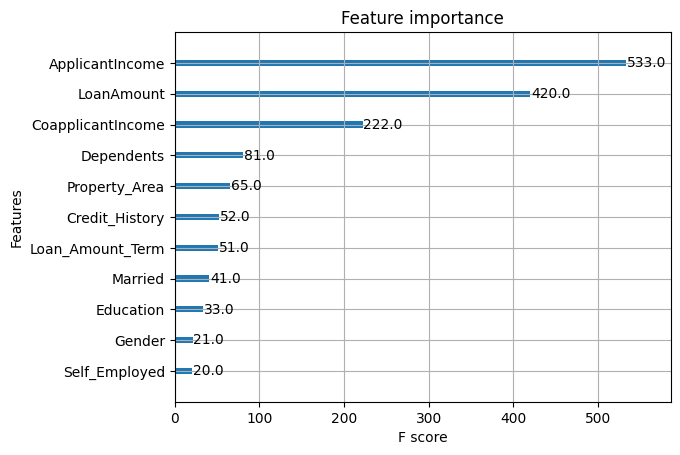

In [21]:
# - Using XGBOOST to find feature importance
x = new_data.drop('Loan_Status', axis = 1)
y = new_data['Loan_Status']

import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [22]:
sel_columns = ['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Dependents',
               'Property_Area', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']

new_data = new_data[sel_columns]
new_data.head()

,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Loan_Amount_Term,Credit_History,Loan_Status
0,0.072991,-0.211241,-0.554487,0,2,0.273231,0.411733,1
1,-0.134412,-0.211241,-0.038732,1,0,0.273231,0.411733,0
2,-0.393747,-0.948996,-0.554487,0,2,0.273231,0.411733,1
3,-0.462062,-0.306435,0.251980,0,2,0.273231,0.411733,1
4,0.097728,-0.056551,-0.554487,0,2,0.273231,0.411733,1


In [23]:
# Show the distribution of all numerical variables in the dataset

num_data = data.select_dtypes(include = 'number')

def plotter(dataframe, a, b , c):
    plt.figure(figsize = (15, 4))
    sns.set(style = 'darkgrid')
    plt.subplot(1, 3, 1)
    sns.distplot(data[a])

    plt.subplot(1, 3, 2)
    sns.boxplot(x = data[b])

    plt.subplot(1, 3, 3)
    sns.boxplot(x = data[c])



num_data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849,0.0,128.0,360.0,1.0
1,1.0,4583,1508.0,128.0,360.0,1.0
2,0.0,3000,0.0,66.0,360.0,1.0
3,0.0,2583,2358.0,120.0,360.0,1.0
4,0.0,6000,0.0,141.0,360.0,1.0


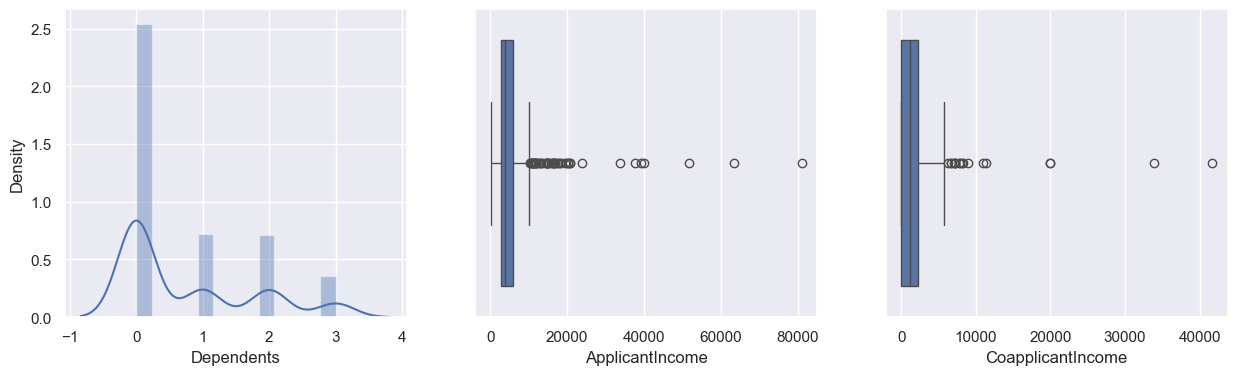

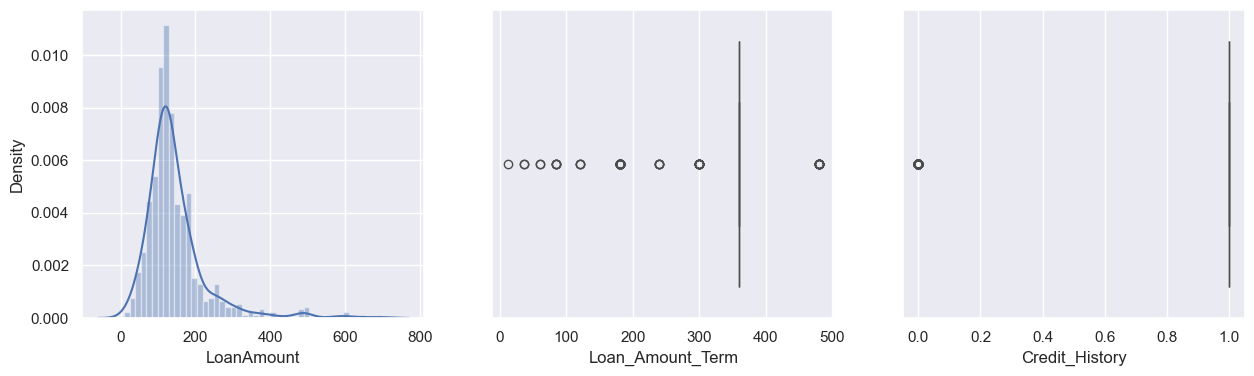

In [24]:
plotter(num_data, 'Dependents', 'ApplicantIncome', 'CoapplicantIncome')
plotter(num_data, 'LoanAmount', 'Loan_Amount_Term', 'Credit_History')

In [25]:
# Is there a relationship between sales and Profit

px.scatter(data_frame=data, x='LoanAmount', y='ApplicantIncome', title = f"Relatonship Btw LoanAmount and ApplicantIncome is {(data['LoanAmount'].corr(data['ApplicantIncome']).round(2) * 100)}%", color = 'LoanAmount')

<b><h3>Modelling

<Axes: xlabel='Loan_Status', ylabel='count'>

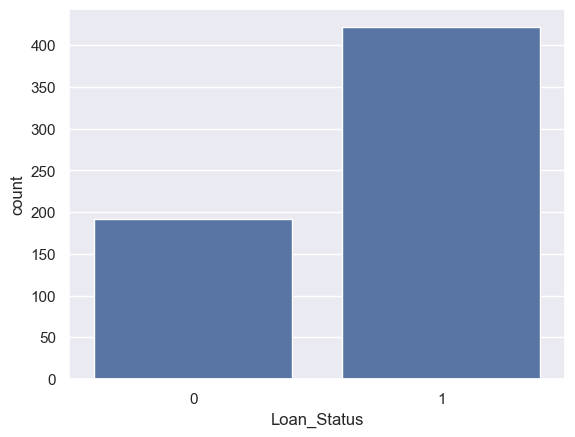

In [26]:
sns.countplot(x = new_data.Loan_Status)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

x = new_data.drop('Loan_Status', axis = 1)
y = new_data.Loan_Status

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 4, stratify = y)

In [28]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

cross_val = logreg.predict(xtrain)
print(classification_report(cross_val, ytrain))

              precision    recall  f1-score   support

           0       0.43      0.90      0.58        73
           1       0.98      0.79      0.87       418

    accuracy                           0.81       491
   macro avg       0.70      0.85      0.73       491
weighted avg       0.90      0.81      0.83       491



<Axes: >

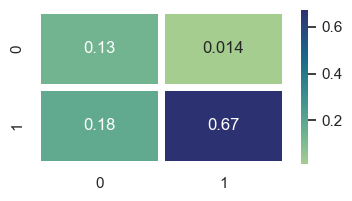

In [29]:
revealer = confusion_matrix(cross_val, ytrain)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

              precision    recall  f1-score   support

           0       0.42      1.00      0.59        16
           1       1.00      0.79      0.89       107

    accuracy                           0.82       123
   macro avg       0.71      0.90      0.74       123
weighted avg       0.92      0.82      0.85       123



<Axes: >

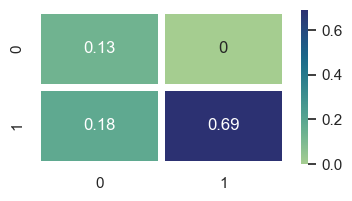

In [30]:
# Evaluating the test set
test_pred = logreg.predict(xtest)

print(classification_report(test_pred, ytest))

revealer = confusion_matrix(test_pred, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)


<hr>
<h3><b>Random oversampling using Synthetic Minority Oversampling Technique (SMOTE). To help reduce the bias of the model towards the majority dataset


In [31]:
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score

smote = SMOTE(sampling_strategy= 'auto', random_state=56)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

In [32]:
# To get the best random state to use
score = []
for i in range(100):
    smote = SMOTE(sampling_strategy= 'auto', random_state = i)
    X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

    test_model = LogisticRegression()
    test_model.fit(X_resampled, y_resampled)

    cross_val = test_model.predict(X_resampled)
    score.append(accuracy_score(cross_val, y_resampled))

print(f'Highest Random State is: {np.array(score).argmax()}')

Highest Random State is: 72


In [33]:
smote = SMOTE(sampling_strategy= 'auto', random_state=72)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

<Axes: xlabel='Loan_Status', ylabel='count'>

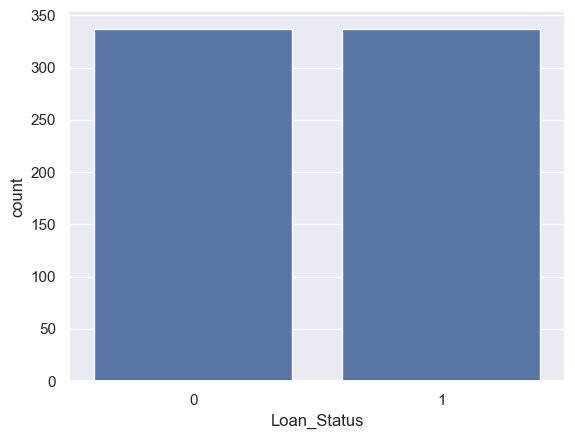

In [34]:
new_balanced_data_smote = pd.concat([X_resampled, y_resampled], axis = 1)

sns.countplot(x = new_balanced_data_smote['Loan_Status'])

In [35]:
logreg = LogisticRegression()
logreg.fit(X_resampled, y_resampled)

cross_val = logreg.predict(X_resampled)
print(classification_report(cross_val, y_resampled))

              precision    recall  f1-score   support

           0       0.51      0.95      0.67       183
           1       0.97      0.67      0.79       491

    accuracy                           0.74       674
   macro avg       0.74      0.81      0.73       674
weighted avg       0.85      0.74      0.76       674



In [36]:
import pickle, joblib
pickle.dump(logreg, open('Loan_Predictmodel.pkl', "wb"))